## Problem 1

### Question 1

In [79]:
from graphviz import Digraph

class Node:
    def __init__(self, label):
        self.label = label

YES = Node("YES")
NO = Node("YES")

1. A ∧ B ̄ ∧ C

In [88]:
graph = Digraph(format='png', graph_attr={'rankdir': 'TB'})
A, B, C = Node('A'), Node('B'), Node('C')
#no_1, no_2, no_3 = Node('No'), Node('No'), Node('No')
nodes = [A, B, C]
#for n in nodes:
#    graph.node(name=str(id(n)), label=n.label, shape='record')
edges = (
    (A, 'True', B),
    (A, 'False', Node('NO')),
    (B, 'True', Node('NO')),
    (B, 'False', C),
    (C, 'True', Node('YES')),
    (C, 'False', Node('NO')),
    )

for edge_info in edges:
    n1, n2 = edge_info[0], edge_info[-1]
    graph.node(name=str(id(n1)), label=n1.label, shape='record')
    graph.node(name=str(id(n2)), label=n2.label, shape='record')
    e_label = edge_info[1]
    graph.edge(str(id(n1)), str(id(n2)), label=str(e_label))
graph.render('q1_1')

'q1_1.png'

2. X ∧ Y ̄ ∨ X ̄ ∧ Y

In [92]:
graph = Digraph(format='png', graph_attr={'rankdir': 'TB'})
X, Y1, Y2 = Node('X'), Node('Y'), Node('Y')
nodes = [X, Y1, Y2]
edges = (
    (X, 'True', Y1),
    (Y1, 'True', Node('NO')),
    (Y1, 'False', Node('YES')),
    (X, 'False', Y2),
    (Y2, 'True', Node('YES')),
    (Y2, 'False', Node('NO')),
    )

for edge_info in edges:
    n1, n2 = edge_info[0], edge_info[-1]
    graph.node(name=str(id(n1)), label=n1.label, shape='record')
    graph.node(name=str(id(n2)), label=n2.label, shape='record')
    label = edge_info[1]
    graph.edge(str(id(n1)), str(id(n2)), label=label)
graph.render('q1_2')

'q1_2.png'

3. X ∧ Y ∧ Z ∨ X ∧ Y ̄ ∧ W ∨ X ̄ ∧ Y

In [93]:
graph = Digraph(format='png', graph_attr={'rankdir': 'TB'})
X, Y1, Y2, Z, W = Node('X'), Node('Y'), Node('Y'), Node('Z'), Node('W')
nodes = [X, Y1, Y2]
edges = (
    (X, 'True', Y1),
    (Y1, 'True', Z),
    (Z, 'True', Node('YES')),
    (Z, 'False', Node('NO')),
    (Y1, 'False', W),
    (W, 'True', Node('YES')),
    (W, 'False', Node('NO')),
    (X, 'False', Y2),
    (Y2, 'True', Node('YES')),
    (Y2, 'False', Node('NO')),
    )

for edge_info in edges:
    n1, n2 = edge_info[0], edge_info[-1]
    graph.node(name=str(id(n1)), label=n1.label, shape='record')
    graph.node(name=str(id(n2)), label=n2.label, shape='record')
    label = edge_info[1]
    graph.edge(str(id(n1)), str(id(n2)), label=label)
graph.render('q1_3')

'q1_3.png'

### Question 2

#### We first conver the pdf table to one we can use in programming to make our life easier

In [1]:
from pypdf import PdfReader
from IPython.display import display
import pandas as pd
import numpy as np
from copy import copy, deepcopy

In [3]:
reader = PdfReader("IDAI610_PS1_DecisionTree.pdf")
page = reader.pages[1]
page_text = page.extract_text(0)
table_text = page_text[119:119 + 454]
table_text = table_text.replace('\n', ' ').replace(
    'Preferred foot', 'Preferred-foot').split(' ')
col_names = table_text[:6]
display(col_names)
data = table_text[6:]
#display(data)

['Player', 'League', 'Position', 'Preferred-foot', 'Capped', 'Shortlisted']

#### Now it's time to get to work

In [4]:
n_features = 6
n_samples = ord('N') - ord('A') + 1

data_dict = dict()
for i, name in enumerate(col_names):
    data_dict[name] = [data[i + n_features * j] for j in range(n_samples)]

df = pd.DataFrame(data_dict)
df

,Player,League,Position,Preferred-foot,Capped,Shortlisted
0,A,SerieA,CF,Left,yes,True
1,B,LaLiga,LW,Right,no,True
2,C,LaLiga,CF,Right,yes,True
3,D,PremierLeague,CF,Left,yes,True
4,E,PremierLeague,LW,Left,yes,False
5,F,SerieA,RW,Left,yes,False
6,G,SerieA,CF,Right,no,True
7,H,PremierLeague,LW,Left,no,False
8,I,SerieA,RW,Right,no,True
9,J,LaLiga,RW,Left,yes,False


In [5]:
# Let's actually delete the player column cause it is of no interest to us
df = df.iloc[:, 1:]
col_names = col_names[1:]
n_features -= 1
df.head(3)

,League,Position,Preferred-foot,Capped,Shortlisted
0,SerieA,CF,Left,yes,True
1,LaLiga,LW,Right,no,True
2,LaLiga,CF,Right,yes,True


In [6]:
df['Shortlisted'].value_counts().tolist()

[8, 6]

In [7]:
np.pad([1, 3], (0, 3))

array([1, 3, 0, 0, 0])

In [8]:
for value in df['League'].unique():
    display(df[df['League']==value])

,League,Position,Preferred-foot,Capped,Shortlisted
0,SerieA,CF,Left,yes,True
5,SerieA,RW,Left,yes,False
6,SerieA,CF,Right,no,True
8,SerieA,RW,Right,no,True
13,SerieA,LW,Left,no,False


,League,Position,Preferred-foot,Capped,Shortlisted
1,LaLiga,LW,Right,no,True
2,LaLiga,CF,Right,yes,True
9,LaLiga,RW,Left,yes,False
10,LaLiga,RW,Right,no,True
12,LaLiga,CF,Right,yes,True


,League,Position,Preferred-foot,Capped,Shortlisted
3,PremierLeague,CF,Left,yes,True
4,PremierLeague,LW,Left,yes,False
7,PremierLeague,LW,Left,no,False
11,PremierLeague,CF,Right,no,False


#### [First Draft] Selection criteria using entropy/info gain

In [8]:
target_col = 'Shortlisted'
n_labels = df[target_col].nunique()

# function to compute the entropy
def compute_entropy(partitioned_df):
    n_samples = len(partitioned_df)
    counts = partitioned_df[target_col].value_counts().tolist()
    counts = np.pad(counts, (0, n_labels - len(counts)))
    probs = counts / n_samples
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

# function to iterate over each possible partition in the dataset
# i.e. for each category of each feature, make a partition of data

overall_entropy = compute_entropy(df)

ig_per_feature = []
for col in col_names[:-1]:
    print("Column: ", col)
    remainder = 0.
    for category in df[col].unique():
        # print(f"\tCategory: {category:12}", end="\t")
        partition = df[df[col] == category]
        entropy = compute_entropy(partition)
        remainder += len(partition)/len(df) * entropy
        # print(f"entropy: ", entropy)
    ig_per_feature.append(overall_entropy - remainder)

ig_per_feature

Column:  League
Column:  Position
Column:  Preferred-foot
Column:  Capped


[np.float64(0.1488348542809168),
 np.float64(0.18913906262520475),
 np.float64(0.2578314624597723),
 np.float64(0.0)]

##### Verifying the results (as a sanity check)
Will use natural log instead of log2 in my own implemention as well JUST for the
sake of comparison becuase sklean only computes info gain with natural log

In [9]:
# ===================== 
# SCIKIT-LEARN
# =====================
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
X = df.iloc[:, :-1]
ordinal_enc = OrdinalEncoder()
X = ordinal_enc.fit_transform(X)
y = df.iloc[:, -1]
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)
info_gain = mutual_info_classif(X, y, discrete_features=True)
print("[SKLEARN] Information Gain for each feature:", info_gain)

# ======================
# MY IMPLEMENTATION
# ======================
def compute_entropy(partitioned_df):
    n_samples = len(partitioned_df)
    counts = partitioned_df[target_col].value_counts().tolist()
    counts = np.pad(counts, (0, n_labels - len(counts)))
    probs = counts / n_samples
    entropy = -np.sum(probs * np.log(probs)) # NOTICE THE LOG instead of LOG2
    return entropy

overall_entropy = compute_entropy(df)
ig_per_feature = []
for col in col_names[:-1]:
    remainder = 0.
    for category in df[col].unique():
        partition = df[df[col] == category]
        entropy = compute_entropy(partition)
        remainder += len(partition)/len(df) * entropy
    ig_per_feature.append(float(overall_entropy - remainder))
print("[MY IMPLEMENTATION] Information Gain for each feature:", ig_per_feature)

# incase you may wonder if there's small deviation
print("\n[Me]: Dear computer, my eyes hurt comparing floats, "
      "can you please verify if all the values are close enough? Thanks! ")
print("[Computer]: They indeed are!" if np.allclose(ig_per_feature, info_gain) else "Nope!")

[SKLEARN] Information Gain for each feature: [0.10316446 0.13110121 0.17871515 0.        ]
[MY IMPLEMENTATION] Information Gain for each feature: [0.10316445961386778, 0.13110120799241154, 0.17871515126363857, 0.0]

[Me]: Dear computer, my eyes hurt comparing floats, can you please verify if all the values are close enough? Thanks! 
[Computer]: They indeed are!


In [10]:
# Selection of the root node
np.argmax(ig_per_feature)

np.int64(2)

In [11]:
col_names[np.argmax(ig_per_feature)]

'Preferred-foot'

#### Let's organize things a little and use both ig and gini

In [12]:
from typing import List

In [13]:
def compute_entropy(partitioned_df, target_feature, n_labels=2):
    n_samples = len(partitioned_df)
    counts = partitioned_df[target_feature].value_counts().tolist()
    counts = np.pad(counts, (0, n_labels - len(counts)))
    probs = counts / n_samples + 1e-15
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

# function to iterate over each possible partition in the dataset
# i.e. for each category of each feature, make a partition of data

def compute_information_gain(
    dataset: pd.DataFrame, 
    features: List[str],
    target_feature: str,
    n_labels: int = 2
)->List[float]:
    """
    Args:
        dataset: Dataset in the form of a pandas dataframe.
        features: List of feature names excluding the target feature.
        target_feature: Name of the target feature
    
    Returns:
        An array/list of floats representing information gain per feature.
    """
    overall_entropy = compute_entropy(dataset, target_feature)

    ig_per_feature = []
    for feature in features:
        remainder = 0.
        for category in dataset[feature].unique():
            partition = dataset[dataset[feature] == category]
            entropy = compute_entropy(partition, target_feature, n_labels)
            remainder += len(partition)/len(dataset) * entropy
        ig_per_feature.append(overall_entropy - remainder)
        
    return ig_per_feature

In [14]:
def compute_gini_impurity(
    dataset: pd.DataFrame,
    features: List[str],
    target_feature: str,
    n_labels: int = 2
)->List[float]:
    """
    Returns:
        An array/list of gini impurity per feature.
    """
    gini_impurity_per_feature = []
    for feature in features:
        weighted_impurity = 0.
        for category in dataset[feature].unique():
            partition = dataset[dataset[feature] == category]
            label_counts = partition[target_feature].value_counts().tolist()
            label_counts = np.pad(label_counts, (0, n_labels - len(label_counts)))
            probs = label_counts / len(partition)
            gini_impurity = 1.0 - np.sum(np.square(probs))
            weighted_impurity += len(partition)/len(dataset) * gini_impurity
        gini_impurity_per_feature.append(weighted_impurity)
    return gini_impurity_per_feature


### Root node selection procedure

#### Pseudo code
    function select_root_node(dataest, features, target_feature, n_labels, criterion):
        // criterion must be in [ig, gini]
    
        criterion_fn = information_gain if criterion is ig else compute_gini_impurity
        
        criterion_values = criterion_fn(dataset, features, target_feature, n_labels)
        
        if criterion is gini:
            feature_index = argmin(criterion_values)
        
        else:
            feature_index = argmax(criterion_values)
        
        return features[feature_index]

#### Implementation:

In [15]:
def select_root_node(
    dataset: pd.DataFrame,
    features: List[str],
    target_feature: str,
    n_labels: int = 2,
    criterion: str = 'gini'):
    assert criterion.lower() in ['ig', 'gini']
    criterion_fn = (
        compute_gini_impurity if criterion == 'gini'
        else compute_information_gain
    )
    criterion_values = criterion_fn(dataset, features, target_feature, n_labels)
    if criterion == 'gini':
        feature_index = np.argmin(criterion_values)
    else:
        feature_index = np.argmax(criterion_values)
    return features[feature_index]
        

In [16]:
features = ['League', 'Position', 'Preferred-foot', 'Capped']
target_feature = 'Shortlisted'

for criterion in ['gini', 'ig']:
    print(f"Root node using {criterion} as criterion: ", end="")
    print(select_root_node(df, features, target_feature, criterion=criterion))

Root node using gini as criterion: Preferred-foot
Root node using ig as criterion: Preferred-foot


# Problem 2

## ID3 implemention 

In [17]:
from typing import Sequence, List
from enum import Enum

In [18]:
NodeType = Enum('NodeType', ['ROOT', 'INTERMEDIATE', 'LEAF'])

In [19]:
class Node:
    def __init__(
        self,
        name: str, 
        majority_label:str,
        parent=None,
        why: str = "404",
        node_type=NodeType.INTERMEDIATE,
        depth: int = 0,
    ):
        self.name = name
        self.parent = parent
        self.depth = depth
        self.why = why
        self.children = []
        self.node_type = node_type
        self.majority_label = majority_label
        self.mapping = dict()
        if parent:
           self.parent.add_child(self) 
    
    def add_child(self, child_node):
        child_node.depth = self.depth + 1
        self.mapping[child_node.why] = child_node
        self.children.append(child_node)

    # This method is being implemented AFTER getting into Problem 3
    # Doing it here, just for the sake of reducing code duplication
    # (i've already made a mess)
    def predict(self, x):
        if self.node_type == NodeType.LEAF:
            return self.name
        value = x[self.name]
        # Return majority label when an unkown value is encountered
        if value not in self.mapping:
            return self.majority_label
        next_node = self.mapping[value]
        return next_node.predict(x)

#### [First Draft] id3 using entropy/information gain as selection criteria

In [20]:
def id3(
    dataset: pd.DataFrame,
    features: List[str],
    target_feature: str,
    parent_node: Node = None,
    why:str='404',
):
    """
    Khawaja's implementation of ID3 algorithm based on the psuedocode in the
    book/slides.
    This implementation utilizes pandas in addition to numpy to make life 
    easier.
    
    Args:
    
        parent_node: Node that called this function. For the first call it would
        be None.
    """
    label_counts = dataset[target_feature].value_counts().tolist()
    majority_label = dataset[target_feature].unique().tolist()[np.argmax(label_counts)]
    print("Majority Label: ", majority_label)
    
    # Base case 1:
    # If all the instances in dataset have the same target label then
    # return a decision tree witha leaf node 
    if len(label_counts) == 1:
        new_node = Node(
            name=majority_label,
            majority_label=majority_label,
            parent=parent_node,
            why=why,
            node_type=NodeType.LEAF)
        return parent_node if parent_node else new_node

    # Base case 2:
    # If the feature set being considered is empty, return a decision tree with
    # leaf node with the majority label in dataset
    elif len(features) == 0:
        new_node = Node(
            name=majority_label,
            majority_label=majority_label,
            parent=parent_node,
            node_type=NodeType.LEAF)
        return parent_node if parent_node else new_node
    
    # Base case 3:
    # If the dataset is empty then return a decision tree with a leaf node with
    # the label of the majority label in the data partition of the immediate
    # parent
    elif len(dataset) == 0:
        new_node = Node(
            name=parent_node.majority_label,
            majority_label=None,
            parent=parent_node,
            why=why,
            node_type=NodeType.LEAF
        )
        return parent_node if parent_node else new_node

    # Else (now the fun part starts)
    fbest = features[
    np.argmax(compute_information_gain(
        dataset,
        features,
        target_feature))]
    new_node = Node(
        name=fbest,
        majority_label=majority_label,
        parent=parent_node,
        why=why,
        node_type=NodeType.INTERMEDIATE)
    print("fbest: ", fbest)
    features.remove(fbest)
    for category in dataset[fbest].unique():
        partition = dataset[dataset[fbest] == category]
        id3(partition, features, target_feature, parent_node=new_node, why=category)
    root = parent_node if parent_node else new_node
    root.node_type = NodeType.ROOT
    return parent_node if parent_node else new_node

In [21]:
features = ['League', 'Position', 'Preferred-foot', 'Capped']
target_feature = 'Shortlisted'
tree = id3(df, features, target_feature, None)

Majority Label:  True
fbest:  Preferred-foot
Majority Label:  True
fbest:  Position
Majority Label:  True
Majority Label:  False
Majority Label:  False
Majority Label:  True
fbest:  League
Majority Label:  True
Majority Label:  True
Majority Label:  False


In [22]:
def print_tree(tree):
    print(tree.name)
    for child in tree.children:
        print_tree(child)
# print_tree(tree)

In [23]:
display([child.name for child in tree.children])
display([child.why for child in tree.children])

['Position', 'League']

['Left', 'Right']

In [24]:
display([child.name for child in tree.children[0].children])
display([child.why for child in tree.children[0].children])

['True', 'False', 'False']

['CF', 'LW', 'RW']

In [25]:
display([child.name for child in tree.children[1].children])
display([child.why for child in tree.children[1].children])

['True', 'True', 'False']

['LaLiga', 'SerieA', 'PremierLeague']

#### Alright, this output may not make any sense to anyone that's not me, so let's visualize our tree

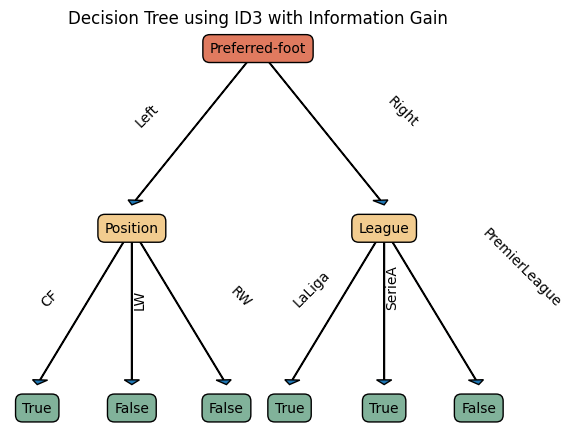

In [26]:
import matplotlib.pyplot as plt

def plot_tree(root, ax, x=0, y=0, dx=1, dy=1):
    # Plot the current node
    facecolor_map = {NodeType.ROOT: '#E07A5F',
                     NodeType.INTERMEDIATE: '#F2CC8F',
                     NodeType.LEAF: '#81B29A'}
    ax.text(x, y, root.name, ha='center', va='center',
            bbox=dict(facecolor=facecolor_map[root.node_type], edgecolor='black', boxstyle='round,pad=0.5'))

    # Plot children
    num_children = len(root.children)
    for i, child in enumerate(root.children):
        child_x = x - dx/2 + dx * (i+1)/(num_children+1)
        child_y = y - dy
        # Draw edge
        #ax.plot([x, child_x], [y, child_y], 'k-')
        # print(f"{x=} {y=} {child_x=} {child_y=}")
        plt.arrow(x, y, child_x - x, child_y - y, length_includes_head=True, head_width=0.02)

        angle = 45 * (-1 if (i+1) == num_children else ((i+1) % num_children))
        #angle = 45 * ((i+1) % num_children)
        ax.text(child_x + 0.001, (y + child_y) / 2, child.why, rotation=angle)
        # Recursively plot child subtree
        plot_tree(child, ax, child_x, child_y - 0.15, dx/num_children, dy)

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Decision Tree using ID3 with Information Gain")
plot_tree(tree, ax)
# currently the edge labels are a bit scuffed

#### id3 implementation allowing both information gain and gini 

In [27]:
def id3(
    dataset: pd.DataFrame,
    features: List[str],
    target_feature: str,
    parent_node: Node = None,
    why:str = '404',
    criterion:str = "ig",
)->Node:
    """
    Khawaja's implementation of ID3 algorithm based on the psuedocode in the
    book/slides allowing both information gain and gini as criterions.
    This implementation utilizes pandas in addition to numpy to make life 
    easier.
    
    Args:
        dataset: Must be pandas dataframe.
        features: List of names of features in the dataset.
        target_feature: Name of target feature.
        parent_node: Node that called this function. For the first call it would
            be None.
        why: why was the node created, or what led to the creation of node.
            In simpler words, it's the edge label that connects parent node 
            with the child node
        criterion: 'ig' or 'gini'
    """
    label_counts = dataset[target_feature].value_counts().tolist()
    majority_label = dataset[target_feature].unique().tolist()[np.argmax(label_counts)]
    criterion_fn = compute_gini_impurity if criterion == "gini" else compute_information_gain
    
    # Base case 1:
    # If all the instances in dataset have the same target label then
    # return a decision tree witha leaf node 
    if len(label_counts) == 1:
        new_node = Node(
            name=majority_label,
            majority_label=majority_label,
            parent=parent_node,
            why=why,
            node_type=NodeType.LEAF)
        return parent_node if parent_node else new_node

    # Base case 2:
    # If the feature set being considered is empty, return a decision tree with
    # leaf node with the majority label in dataset
    elif len(features) == 0:
        new_node = Node(
            name=majority_label,
            majority_label=majority_label,
            parent=parent_node,
            why=why,
            node_type=NodeType.LEAF)
        return parent_node if parent_node else new_node
    
    # Base case 3:
    # If the dataset is empty then return a decision tree with a leaf node with
    # the label of the majority label in the data partition of the immediate
    # parent
    elif len(dataset) == 0:
        new_node = Node(
            name=parent_node.majority_label,
            majority_label=None,
            parent=parent_node,
            why=why,
            node_type=NodeType.LEAF
        )
        return parent_node if parent_node else new_node

    # Else (now the fun part starts)
    criteria_vals = criterion_fn(
        dataset,
        features,
        target_feature)
    #print(f"{criteria_vals=}")
    if criterion == "gini":
        idx = np.argmin(criteria_vals)
    else:
        idx = np.argmax(criteria_vals)
    #print(f"{idx}")
    fbest = features[idx]
    new_node = Node(
        name=fbest,
        majority_label=majority_label,
        parent=parent_node,
        why=why,
        node_type=NodeType.INTERMEDIATE)
    #print("fbest: ", fbest)
    features.remove(fbest)
    for category in dataset[fbest].unique():
        partition = dataset[dataset[fbest] == category]
        id3(partition, features, target_feature, parent_node=new_node,
            why=category, criterion=criterion)
    return parent_node if parent_node else new_node

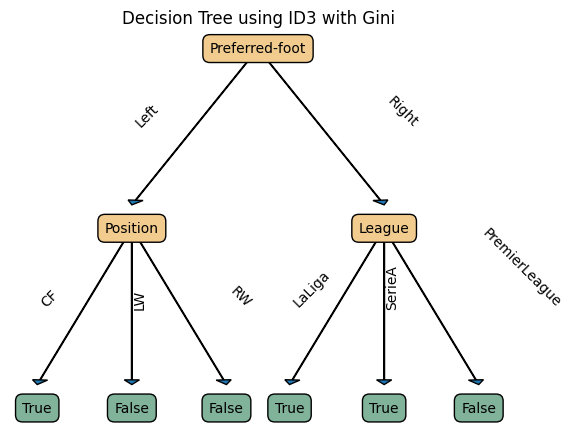

In [28]:
features = ['League', 'Position', 'Preferred-foot', 'Capped']
target_feature = 'Shortlisted'
tree = id3(df, features, target_feature, None, criterion="gini")

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Decision Tree using ID3 with Gini")
plot_tree(tree, ax)

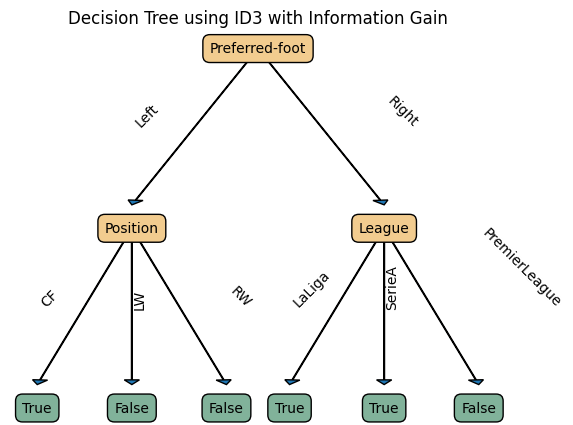

In [29]:
features = ['League', 'Position', 'Preferred-foot', 'Capped']
target_feature = 'Shortlisted'
tree = id3(df, features, target_feature, None, criterion="ig")

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Decision Tree using ID3 with Information Gain")
plot_tree(tree, ax)

#### Tree graph plotting using graphviz

In [30]:
from graphviz import Digraph

def trace(root):
    nodes, edges, edge_labels = set(), set(), list()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.children:
                edges.add((v, child))
                edge_labels.append(child.why)
                build(child)
    build(root)
    return nodes, edges, edge_labels

def draw_graph(root):
    nodes, edges, edge_labels = trace(root)
    graph = Digraph(format='png', graph_attr={'rankdir': 'TB'})

    for n in nodes:
        graph.node(name=str(id(n)), label=n.name, shape='record')
    for (n1, n2), label in zip(edges, edge_labels):
        graph.edge(str(id(n1)), str(id(n2)), label=str(label))
    return graph

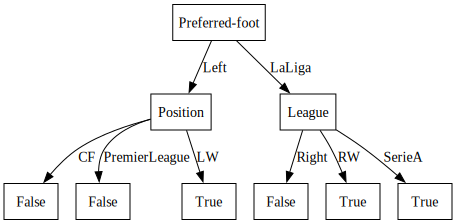

In [31]:
features = ['League', 'Position', 'Preferred-foot', 'Capped']
target_feature = 'Shortlisted'
tree = id3(df, features, target_feature, None, criterion="ig")
draw_graph(tree)

#### Alright buckle up, let's implement pruining!

In [32]:
# Chi-Square critical value :)
from scipy.stats import chi2

chi2.ppf(1 - 0.05, 3)

np.float64(7.8147279032511765)

In [33]:
# sanity check for pen nodes digger
penultimate_nodes = []
def dig(root):
    for child in root.children:
        if child.node_type == NodeType.LEAF:
            if child.parent not in penultimate_nodes:
                penultimate_nodes.append(child.parent)
        else:
            dig(child)
dig(tree)
for node in penultimate_nodes:
    print(node.name)

Position
League


## TODO
1. Maybe use breadth-first search approach to organize penultimate nodes?
2. No no, wait, we should add a depth attr to each node, and any node that has
occurs at a depth that shouldn't be pruned, the function stops. 

In [34]:
from scipy.stats import chi2

def prune_tree(
    root: Node,
    dataset: pd.DataFrame,
    target_feature: str,
    significance_level: float = 0.05,
    max_pruning_depth: int = 1,
)->List[Node]:
    """
    Assumes binary target feature.

    Args:
        max_pruning_depth: The maximum depth to which the tree can be pruned.
            Remember the root is at depth 0, then 1, 2, 3... and so on.
    """
    
    if len(root.children) == 0:
        return []
    penultimate_nodes = []
    def dig(root):
        for child in root.children:
            if child.node_type == NodeType.LEAF:
                if child.parent not in penultimate_nodes:
                    penultimate_nodes.append(child.parent)
            else:
                dig(child)
    dig(tree)
    #print(f"{penultimate_nodes=}")
    
    # would obviously break if the target feature isn't binary
    # Note: I'm following nomenclature used in the R&N book
    p, n = dataset[target_feature].value_counts().to_list()
    labels = dataset[target_feature].unique()
    
    # Let's begin pruning
    while True:
        node = penultimate_nodes.pop(0)
        if node.parent == None:
            if len(penultimate_nodes) == 0:
                break
            continue
        delta = 0.
        degrees_of_freedom = dataset[node.name].nunique() - 1
        for category in dataset[node.name].unique():
            partition = dataset[dataset[node.name]==category]
            if partition[target_feature].nunique() == 1:
                if partition[target_feature].unique()[0] == labels[0]:
                    pk = partition[target_feature].value_counts().tolist()[0]
                    nk = 0
                else:
                    nk = partition[target_feature].value_counts().tolist()[0]
                    pk = 0
            else:
                pk, nk = partition[target_feature].value_counts().tolist()
            pk_hat = (len(partition) / len(dataset)) * p
            nk_hat = (len(partition) / len(dataset)) * n
            delta += (pk - pk_hat)**2 / pk_hat + (nk - nk_hat)**2 / nk_hat
        threshold = chi2.ppf(1.0 - significance_level, degrees_of_freedom)
        if delta < threshold:
            # prune it away
            node.parent.children.remove(node)
            new_node = Node(
                name=node.majority_label,
                majority_label=node.majority_label,
                parent=node.parent,
                why=node.why,
                node_type=NodeType.LEAF,
            )
            penultimate_nodes.append(node.parent)
            for child_node in node.children:
                del child_node
            del node
        
        if len(penultimate_nodes) == 0:
            break    

None

Pruning....


None

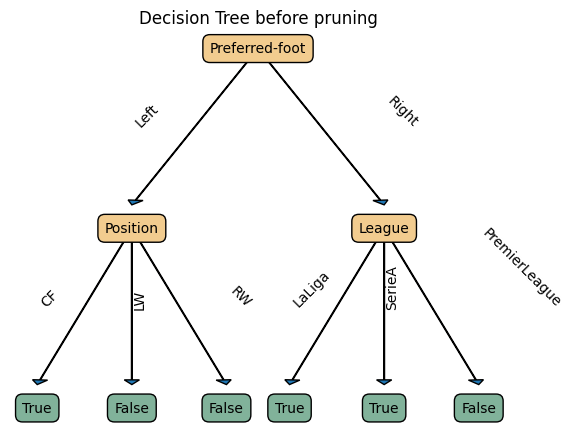

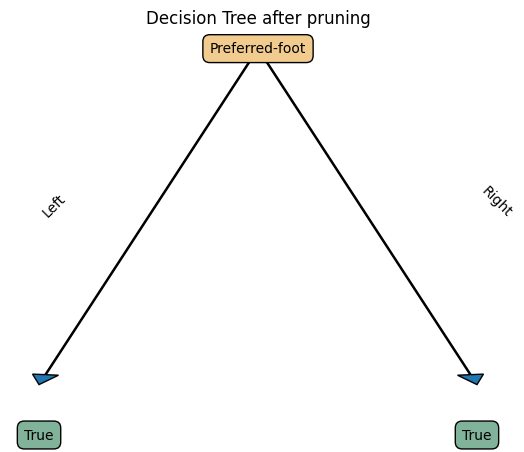

In [35]:
features = ['League', 'Position', 'Preferred-foot', 'Capped']
target_feature = 'Shortlisted'
tree = id3(df, features, target_feature, None, criterion="ig")

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Decision Tree before pruning")
display(plot_tree(tree, ax))


print("Pruning....")
prune_tree(tree,
          df,
          target_feature)

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Decision Tree after pruning")
display(plot_tree(tree, ax))

# Problem 3 

## Use your decision tree to develop a model for WDBC

### Train

In [36]:
import pandas as pd

train_df = pd.read_csv("./wdbc/wdbc_train.csv")
train_df.head(3)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,...,worstTexture,worstPerimeter,worstArea,worstSmoothness,worstCompactness,worstConcavity,worstConcavePoints,worstSymmetry,worstFractalDimension,Diagnosis
0,l4,l5,l4,l4,l5,l4,l4,l5,l4,l4,...,l5,l4,l4,l5,l4,l4,l4,l4,l4,M
1,l2,l3,l2,l2,l3,l3,l3,l3,l5,l4,...,l3,l2,l3,l3,l3,l3,l3,l4,l4,B
2,l4,l3,l4,l4,l3,l3,l3,l3,l2,l2,...,l3,l3,l3,l3,l3,l3,l3,l3,l3,B


In [37]:
train_df.describe()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,...,worstTexture,worstPerimeter,worstArea,worstSmoothness,worstCompactness,worstConcavity,worstConcavePoints,worstSymmetry,worstFractalDimension,Diagnosis
count,341,341,341,341,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
unique,5,6,5,5,6,5,5,5,6,5,...,6,5,5,6,5,5,5,6,5,2
top,l3,l3,l3,l3,l3,l3,l3,l3,l3,l3,...,l3,l3,l3,l3,l3,l3,l3,l3,l3,B
freq,160,130,162,187,125,157,184,178,133,161,...,128,172,218,120,174,155,149,159,174,214


In [38]:
train_df.shape

(341, 31)

In [39]:
set(train_df['Texture'].unique())

{'l1', 'l2', 'l3', 'l4', 'l5', 'l6'}

In [40]:
target_feature = 'Diagnosis'
features = list(set(train_df.columns) - set([target_feature]))

In [41]:
tree = id3(train_df, features, target_feature)

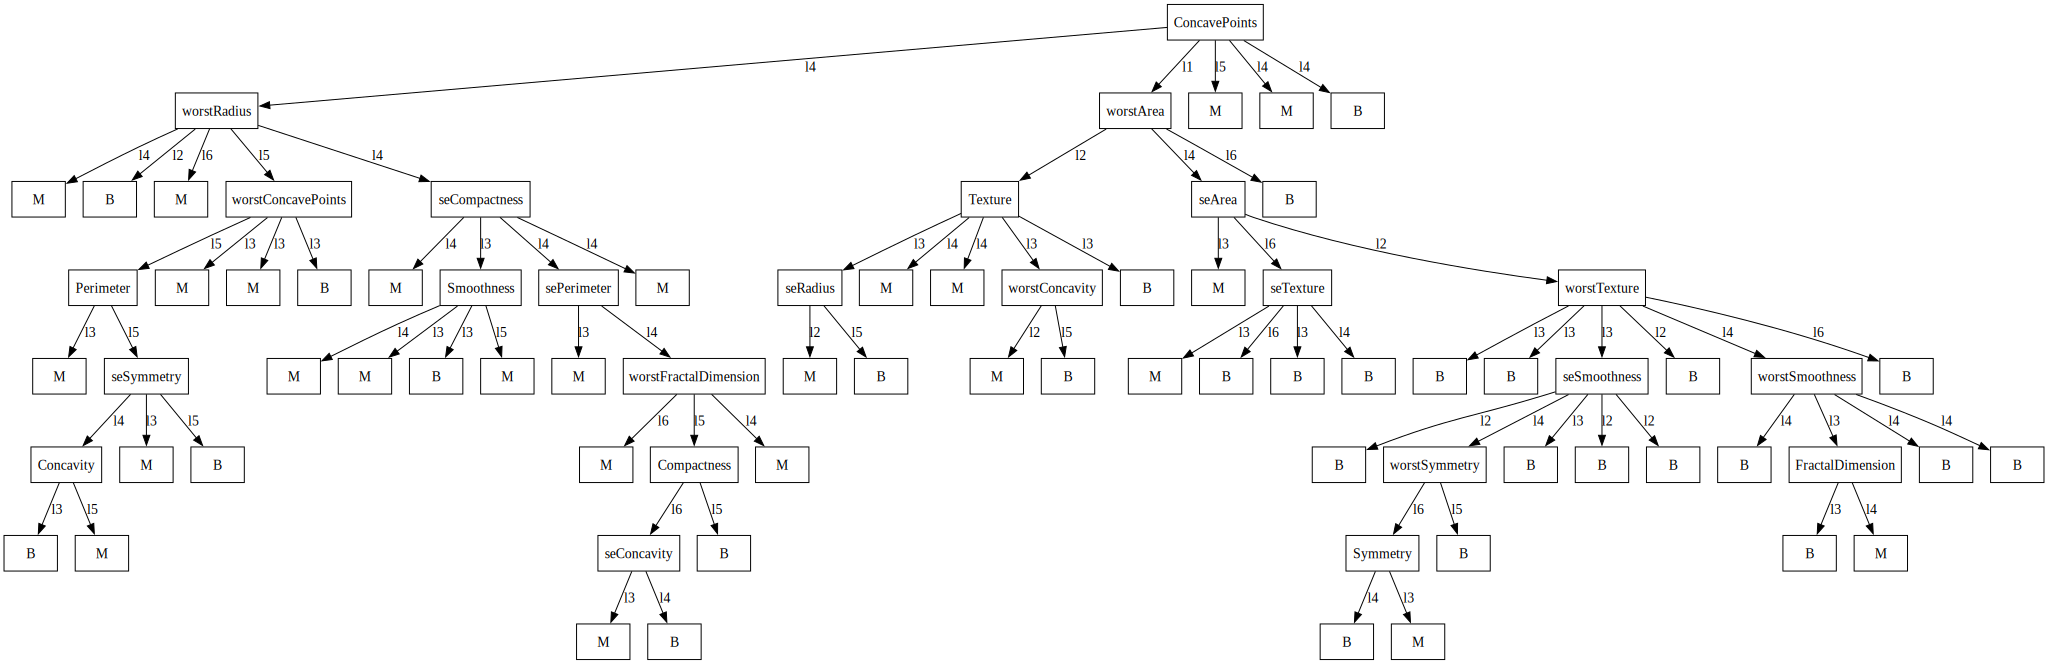

In [42]:
draw_graph(tree)

### Function for prediction on batch using our tree

In [43]:
#### Let's just run a sanity check rq
tree.predict(train_df.iloc[0, :-1])

'M'

In [44]:
def tree_batch_predict(tree, x_batch: pd.DataFrame)->np.array:
    return np.asarray(list(map(tree.predict, x_batch.to_dict('records'))))

### Tuning

Tuning focuses on selecting the best node-splitting criterion (Gini or IG).

My implemention also incorporates the selection of chi-squared pruning.

In [45]:
prune_tree?

Signature:
prune_tree(
    root: __main__.Node,
    dataset: pandas.core.frame.DataFrame,
    target_feature: str,
    significance_level: float = 0.05,
    max_pruning_depth: int = 1,
) -> List[__main__.Node]
Docstring:
Assumes binary target feature.

Args:
    max_pruning_depth: The maximum depth to which the tree can be pruned.
        Remember the root is at depth 0, then 1, 2, 3... and so on.
File:      /var/folders/82/ljg8t9595y560zqhfz0z4qs00000gn/T/ipykernel_4548/282106854.py
Type:      function

In [46]:
dev_df = pd.read_csv("./wdbc/wdbc_dev.csv")
dev_df.shape

(114, 31)

In [47]:
id3?

Signature:
id3(
    dataset: pandas.core.frame.DataFrame,
    features: List[str],
    target_feature: str,
    parent_node: __main__.Node = None,
    why: str = '404',
    criterion: str = 'ig',
) -> __main__.Node
Docstring:
Khawaja's implementation of ID3 algorithm based on the psuedocode in the
book/slides allowing both information gain and gini as criterions.
This implementation utilizes pandas in addition to numpy to make life 
easier.

Args:
    dataset: Must be pandas dataframe.
    features: List of names of features in the dataset.
    target_feature: Name of target feature.
    parent_node: Node that called this function. For the first call it would
        be None.
    why: why was the node created, or what led to the creation of node.
        In simpler words, it's the edge label that connects parent node 
        with the child node
    criterion: 'ig' or 'gini'
File:      /var/folders/82/ljg8t9595y560zqhfz0z4qs00000gn/T/ipykernel_4548/755342998.py
Type:      function

In [66]:
from copy import deepcopy, copy

def binary_accuracy(
    y_true: np.array,
    y_pred: np.array
):
    return np.mean(y_true == y_pred)

def tree_tuner(
    tree_builder: callable,
    train_dataset: pd.DataFrame,
    dev_dataset: pd.DataFrame,
    features: List[str],
    target_feature: str,
    objective_fn: callable = binary_accuracy,
    objective_type: str = 'max', # minimize or maximize
):
    '''
    tree tuner aims the find the best tree with the best config from a given
    space of hyperparameters.

    Args:
        tree_builder: A function that builds the tree. For instance, id3.
        train_dataset: training dataset. Must be pandas dataframe.
        dev_dataset: Dataset for tuning hyperparameters.
        features: List of names of features in the dataset.
        target_feature: Name of the target feature.
        objective_fn: Objective function that you're trying to optimize the tree
            for.
        objective_type: Whether to maximize the objective value or minimize it.
            Must be in ['min', 'max'].
    '''
    assert objective_type in ['min', 'max']
    
    best_tree = None
    curr_config = dict()
    best_config = dict()
    best_score = -np.inf if objective_type == 'max' else np.inf
    trial = 0
    # Obviously not the best way to do 'grid search' but hey it looks more
    # intutive when there' just two hyperparameters with only like 2 values each
    for criterion in ['gini', 'ig']:
        for prune in [False, True]:
            curr_config['criterion'] = criterion
            curr_config['prune'] = prune
            # train
            tree = tree_builder(
                train_dataset,
                copy(features),
                target_feature,
                criterion=criterion
            )
            if prune:
                # Remember prune_tree prunes the tree in place
                prune_tree(
                    tree,
                    train_dataset,
                    target_feature,
                    max_pruning_depth=1
                )
            # evaluate on dev
            y_pred = tree_batch_predict(tree, dev_dataset)
            score = objective_fn(
                dev_dataset[target_feature].values,
                y_pred
            )
            if objective_type == 'max' and score > best_score:
                best_tree = deepcopy(tree)
                best_config = curr_config
                best_score = score
            print(f"Trial: {trial} | Score: {score} | Best Score: {best_score}", end="")
            print(f" | Current Config: {curr_config} | Best Config: {best_config}")
            trial += 1
    return best_tree, best_config, best_score

In [67]:
target_feature = 'Diagnosis'
features = list(set(dev_df.columns) - set([target_feature]))

best_tree, best_config, best_score = tree_tuner(id3, train_df, dev_df, features, target_feature)

Trial: 0 | Score: 0.9736842105263158 | Best Score: 0.9736842105263158 | Current Config: {'criterion': 'gini', 'prune': False} | Best Config: {'criterion': 'gini', 'prune': False}
Trial: 1 | Score: 0.9736842105263158 | Best Score: 0.9736842105263158 | Current Config: {'criterion': 'gini', 'prune': True} | Best Config: {'criterion': 'gini', 'prune': True}
Trial: 2 | Score: 0.9649122807017544 | Best Score: 0.9736842105263158 | Current Config: {'criterion': 'ig', 'prune': False} | Best Config: {'criterion': 'ig', 'prune': False}
Trial: 3 | Score: 0.9649122807017544 | Best Score: 0.9736842105263158 | Current Config: {'criterion': 'ig', 'prune': True} | Best Config: {'criterion': 'ig', 'prune': True}


Developer Note: It is just weird that the pruned tree result in exact same accuracy as the original.

It's not because my pruning process is flawed. It is clearly working. Let me demonstrate.

In [68]:
# Sanity check that pruning is indeed working.
# Demonstration on training dataset
target_feature = 'Diagnosis'
features = list(set(dev_df.columns) - set([target_feature]))

tree = id3(train_df, copy(features), target_feature)
print("Accuracy on train before pruning: ", np.mean(train_df[target_feature] == tree_batch_predict(tree, train_df)))
#display(draw_graph(tree))

prune_tree(tree, train_df, target_feature)
print("Accuracy on train after pruning: ", np.mean(train_df[target_feature] == tree_batch_predict(tree, train_df)))
#draw_graph(tree)

Accuracy on train before pruning:  1.0
Accuracy on train after pruning:  0.9765395894428153


### Test

In [69]:
test_df = pd.read_csv("./wdbc/wdbc_test.csv")
test_df.shape

(114, 31)

In [70]:
test_accuracy = np.mean(test_df[target_feature] == tree_batch_predict(best_tree, test_df))
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8859649122807017


Not bad, eh?

# [Optional] Discretize features

In [ ]:
#

In [ ]:
## Perform